In [1]:
from surrogate_model.HK import HK
from run_functions.train_models import train_models
from Eng_2d_RAE2822.plot_2d_RAE import *
import numpy as np
import matplotlib.pyplot as plt
import pickle


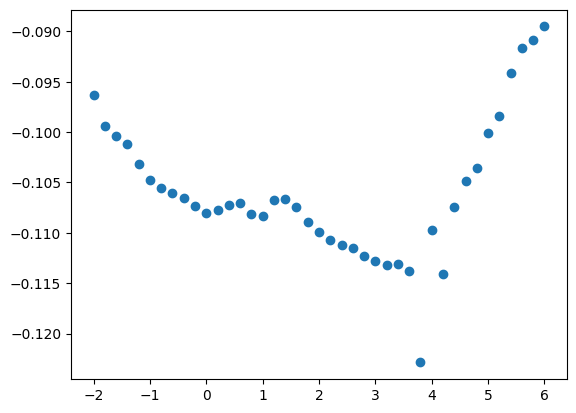

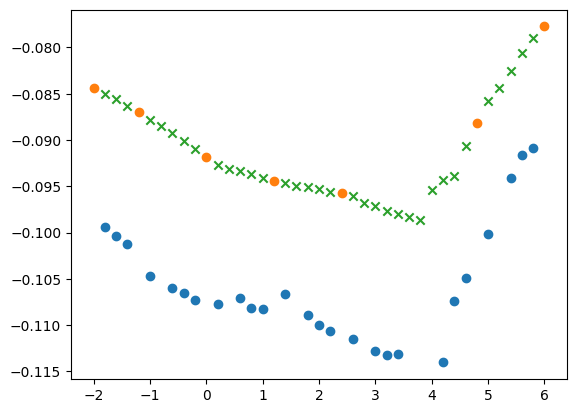

(26, 1) (7, 1) (34,)


In [2]:
# hf_test=np.load("coeff_hf100.npy")
AoA_start, AoA_end = -2, 6
x = np.linspace(AoA_start, AoA_end,41)
hf=np.load("kflow_hf.npy")
lf=np.load("kflow_lf.npy")

plt.scatter(np.linspace(AoA_start, AoA_end,41),lf[:,2])
plt.show()

# HF는 3개 징검다리로 skip
# hf = np.delete(hf,[-1,-2],0) # aoa 16.5과 16은 HF cd 값이 너무 극단적으로증가해서 제외
temp_idx = [6*i+4 for i in range(7)]

temp_idx.remove(28) # 얘는 원래 있었음!
if not 0 in temp_idx:
  train_idx = [0] + temp_idx
if not 40 in temp_idx:
  train_idx = [40] + temp_idx
# train_idx = [0] + temp_idx + [40] # [29] 값이 outlier니까 포함하게끔 조정하기

total_idx_temp = [i for i in range(hf.shape[0])] 
vali_idx = list(set(total_idx_temp) - set(train_idx))

hf_vali = hf[vali_idx]
hf_x_vali = x[vali_idx]
hf = hf[train_idx]
hf_x = x[train_idx]

# 점 개수 너무 많아서 하나씩 skip
# del_idx = [3*i+2 for i in range(int(lf.shape[0]/3)+0)]
# lf = np.delete(lf,del_idx,0) 
# lf_x = np.delete(x,del_idx,0)
# lf_idx = [4*i+0 for i in range(11)] +  [4*i+2 for i in range(10)] + [4*i+3 for i in range(10)] #+ [7*i+4 for i in range(6)] + [7*i+5 for i in range(6)] + [7*i+6 for i in range(5)]
# lf_idx.remove(0) # 시작점 제외 (aoa -2)
# lf_idx.remove(40) # 끝점 제외 (aoa 6)
# lf_idx.append(1)
# lf_idx.remove(29) # 얘 값은 너무 튐 (aoa 3.8)
# lf_idx = list(set(total_idx_temp) - set(temp_idx))
lf_idx = [6*i+1 for i in range(7)] + [6*i+2 for i in range(7)] + [6*i+3 for i in range(7)] +  [6*i+5 for i in range(6)]
# lf_idx = [6*i+1 for i in range(7)] + [6*i+3 for i in range(7)] +  [6*i+5 for i in range(6)]
# lf_idx.append(1)
# lf_idx.append(38)
try:
  lf_idx.remove(29)
except:
  pass
try:
  lf_idx.remove(0)
except:
  pass
try:
  lf_idx.remove(40)
except:
  pass


lf = lf[lf_idx]
lf_x = x[lf_idx]

hf_cl = hf[:,0] 
hf_cd = hf[:,1] 
hf_cm = hf[:,2] 

vali_cl = hf_vali[:,0] 
vali_cd = hf_vali[:,1] 
vali_cm = hf_vali[:,2] 

lf_cl = lf[:,0] 
lf_cd = lf[:,1] 
lf_cm = lf[:,2] 

lf_x = np.reshape(lf_x,(-1,1))
hf_x = np.reshape(hf_x,(-1,1))

plt.scatter(lf_x,lf_cm)
plt.scatter(hf_x,hf_cm)
plt.scatter(hf_x_vali,vali_cm,marker='x')
plt.show()
print(lf_x.shape, hf_x.shape, hf_x_vali.shape)
# print(np.sort(lf_x[:,0]))
# print(np.sort(hf_x[:,0]))


C:\Users\Woong\AppData\Local\Temp\ipykernel_28088\1926162207.py:9: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x[0],cm[0],marker='x',edgecolors='r',facecolors='r',label="HF validation points")


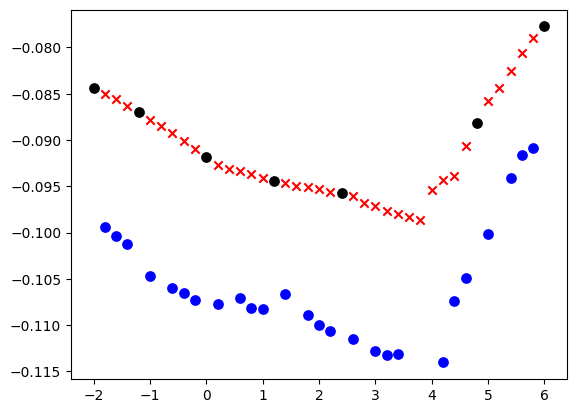

In [3]:
x = [lf_x]
cm = [lf_cm]
plt.scatter(x,cm,edgecolors='b',facecolors='b',s=45,label="LF training points")
x = [lf_x,hf_x]
cm = [lf_cm,hf_cm]
plt.scatter(x[1],cm[1],edgecolors='k',facecolors='k',s=45,label="HF training points")
x = [hf_x_vali]
cm = [vali_cm]
plt.scatter(x[0],cm[0],marker='x',edgecolors='r',facecolors='r',label="HF validation points")


In [4]:
# file_i_MF = open('./MyDrive/MyDrive/Colab Notebooks/data fusion/RHK_thesis/KFLOW_HK_i_MF.obj', 'rb')
# HK_i_MF = pickle.load(file_i_MF)
# file_r_MF = open('./MyDrive/MyDrive/Colab Notebooks/data fusion/RHK_thesis/KFLOW_HK_r_MF.obj', 'rb')
# HK_r_MF = pickle.load(file_r_MF)
# file_i_HF = open('./MyDrive/MyDrive/Colab Notebooks/data fusion/RHK_thesis/KFLOW_HK_i_HF.obj', 'rb')
# HK_i_HF = pickle.load(file_i_HF)
# file_r_HF = open('./MyDrive/MyDrive/Colab Notebooks/data fusion/RHK_thesis/KFLOW_HK_r_HF.obj', 'rb')
# HK_r_HF = pickle.load(file_r_HF)

(26, 1) (26,)
(7, 1) (7,)
#########  Level 0 starts  #########
   Final generation = 12
   Optimal theta = [2.56839149]
   Optimal beta = -0.10467007917239562
   Optimal likelihood = 158.434473
   Optimal R's condition number = 3369.912790
   Level 0 finishes with time 1.143038[s]
#########  Level 1 starts  #########
   Final generation = 12
   Optimal theta = [0.27062712]
   Optimal beta = 0.672687033580293
   Optimal likelihood = 39.294596
   Optimal R's condition number = 10821.456040
   Level 1 finishes with time 0.153139[s]
#########  HK total training time = 1.296178[s]  #########

#########  Level 0 starts  #########
   Final generation = 28
   Optimal theta = [0.58498052]
   Optimal beta = -0.0972041104783313
   Optimal nugget = 9.964748E-04
   Optimal likelihood = 160.800093
   Optimal R's condition number = 16560.685545
   Level 0 finishes with time 2.152881[s]
#########  Level 1 starts  #########
   Final generation = 29
   Optimal theta = [0.27343263]
   Optimal beta = 0.67

([[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1.]),
   array([-0.10754701, -0.10763497, -0.1076764 , -0.10766152, -0.10768   ,
          -0.1079171 , -0.10781126])],
  array([2.73432626e-01, 3.56073592e-11])],
 [array([0.58498052]), array([0.27343263])])

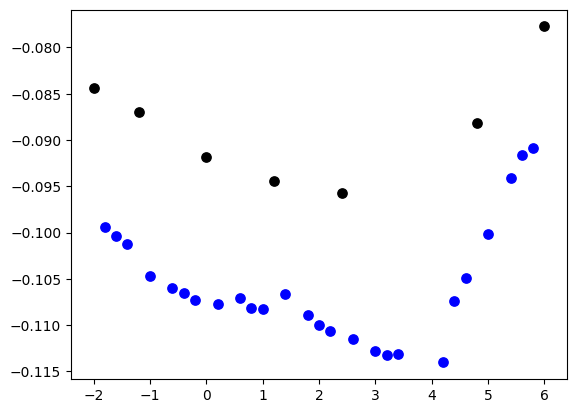

In [6]:
x = [lf_x, hf_x]
cm = [lf_cm, hf_cm]
plt.scatter(x[0],cm[0],edgecolors='b',facecolors='b',s=45,label="LF training points")
plt.scatter(x[1],cm[1],edgecolors='k',facecolors='k',s=45,label="HF training points")
print(lf_x.shape, lf_cm.shape)
print(hf_x.shape, hf_cm.shape)
IHK = HK(x=x, y=cm, n_pop=[30] * len(x), n_gen=[100] * len(x), HKtype="i")
IHK.fit(history=True, rand_seed=42)
# IHK_time_ = time.time()-temp_time
#
# temp_time = time.time()
RHK = HK(x=x, y=cm, n_pop=[30] * len(x), n_gen=[100] * len(x), HKtype="r")
RHK.fit(history=True, rand_seed=42)



[0.0009964748160272803, 3.5607359213786685e-11]


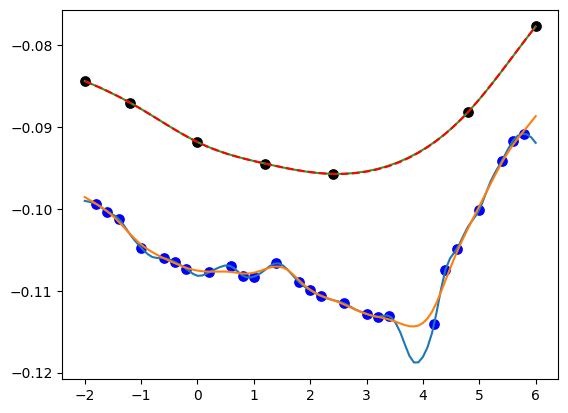

In [7]:
x_test = np.linspace(AoA_start, AoA_end,101).reshape(-1,1)

pred_i = IHK.predict(x_test, return_std=False, pred_fidelity=0)
pred_r = RHK.predict(x_test, return_std=False, pred_fidelity=0)
plt.plot(x_test, pred_i)
plt.plot(x_test, pred_r)
print(RHK.total_opt_nugget)
pred_i2 = IHK.predict(x_test, return_std=False, pred_fidelity=1)
pred_r2 = RHK.predict(x_test, return_std=False, pred_fidelity=1)
plt.plot(x_test, pred_i2)
plt.plot(x_test, pred_r2,'r--')
# plt.ylim(-0.095, -0.0925)

plt.scatter(IHK.x_original[0],IHK.y[0],edgecolors='b',facecolors='b',s=45,label="LF training points")

plt.scatter(IHK.x_original[1],IHK.y[1],edgecolors='k',facecolors='k',s=45,label="HF training points")
# x = [hf_x_vali]
# cm = [vali_cm]
# plt.scatter(x[0],cm[0],marker='x',color='r',label="HF validation points")


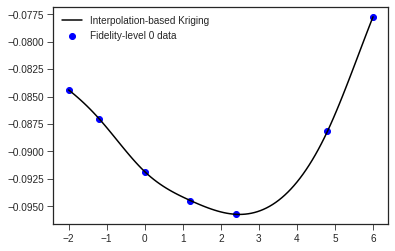

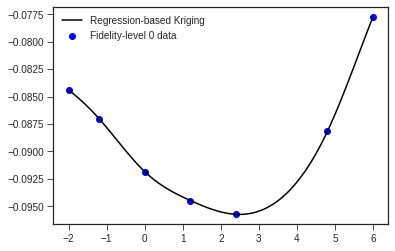

In [10]:
x = [hf_x]
cm = [hf_cm]

pop = [300,300]
gen = [200,200]
x_test = np.linspace(AoA_start, AoA_end,101)
HK_i_HF = HK(x,cm,pop,gen,"i")
HK_i_HF.train()
HK_i_HF.plot_var(x_test,0)

HK_r_HF = HK(x,cm,pop,gen,"r")
HK_r_HF.train()
HK_r_HF.plot_var(x_test,0)

In [ ]:
# file_i_MF = open('./MyDrive/MyDrive/Colab Notebooks/data fusion/RHK_thesis/KFLOW_HK_i_MF.obj', 'wb') 
# pickle.dump(HK_i_MF, file_i_MF)
# file_r_MF = open('./MyDrive/MyDrive/Colab Notebooks/data fusion/RHK_thesis/KFLOW_HK_r_MF.obj', 'wb') 
# pickle.dump(HK_r_MF, file_r_MF)
# file_i_HF = open('./MyDrive/MyDrive/Colab Notebooks/data fusion/RHK_thesis/KFLOW_HK_i_HF.obj', 'wb') 
# pickle.dump(HK_i_HF, file_i_HF)
# file_r_HF = open('./MyDrive/MyDrive/Colab Notebooks/data fusion/RHK_thesis/KFLOW_HK_r_HF.obj', 'wb') 
# pickle.dump(HK_r_HF, file_r_HF)


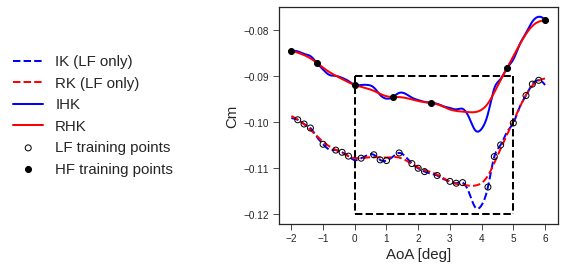

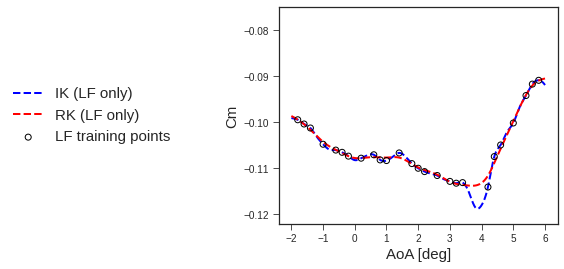

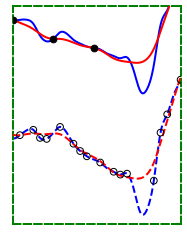

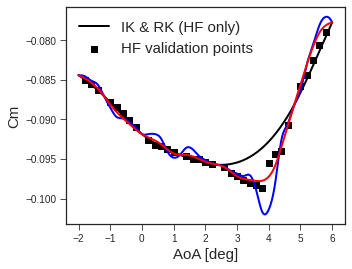

In [36]:
# x_test = np.linspace(-4,16.5,1001)
# print(np.min([np.min(hf_x_vali),np.min(hf_x)]))
x_test = np.linspace(np.min([np.min(lf_x),np.min(hf_x),np.min(hf_x_vali)]),np.max([np.max(lf_x),np.max(hf_x),np.max(hf_x_vali)]),1001)
y_pred_i_LF= HK_i_MF.pred_y_MSE(x_test, 0)[0]
y_pred_r_LF= HK_r_MF.pred_y_MSE(x_test, 0)[0]
y_pred_i_HF= HK_i_HF.pred_y_MSE(x_test, 0)[0]
y_pred_r_HF= HK_r_HF.pred_y_MSE(x_test, 0)[0]
y_pred_i_MF= HK_i_MF.pred_y_MSE(x_test, 1)[0]
y_pred_r_MF= HK_r_MF.pred_y_MSE(x_test, 1)[0]
# y_pred_i_MF_= HK_i_MF_.pred_y_MSE(x_test, 1)[0]
# y_pred_r_MF_= HK_r_MF_.pred_y_MSE(x_test, 1)[0]

left_bot = [0,-0.11]
right_top = [2,-0.09]
left_bot = [0,-0.12]
right_top = [5,-0.09]


############# LF only + MF 
x = [lf_x,hf_x]
cm = [lf_cm,hf_cm]

plt.figure(figsize=(5,4))
plt.scatter(x[0],cm[0],edgecolors='k',facecolors='none',label="LF training points",zorder = 4)
plt.scatter(x[1],cm[1],edgecolors='k',facecolors='k',label="HF training points",zorder = 5)
# plt.plot(x_test,y_pred_i_HF,'b-.',label = "IK (HF only)", lw=2,zorder = 0)
# plt.plot(x_test,y_pred_r_HF,'r-.',label = "RK (HF only)", lw=2,zorder = 1)
plt.plot(x_test,y_pred_i_LF,'b--',label = "IK (LF only)", lw=2,zorder = 0)
plt.plot(x_test,y_pred_r_LF,'r--',label = "RK (LF only)", lw=2,zorder = 1)
plt.plot(x_test,y_pred_i_MF,'b-',label = "IHK", lw=2,zorder = 2)
plt.plot(x_test,y_pred_r_MF,'r-',label = "RHK", lw=2,zorder = 3)
# plt.plot(x_test,y_pred_i_MF,'g-',label = "IHK (LF + shifted HF)", lw=2,zorder = 4)
# plt.plot(x_test,y_pred_r_MF-0.05,'g--',label = "RHK (LF + shifted HF)", lw=2,zorder = 5)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(-1, 0.5),frameon=False)
plt.xlabel("AoA [deg]",fontsize=15)
plt.ylabel("Cm",fontsize=15)
plt.plot([left_bot[0], left_bot[0]], [right_top[1], left_bot[1]], '--',color='k', lw=2)
plt.plot([right_top[0], right_top[0]], [right_top[1], left_bot[1]], '--',color='k', lw=2)
plt.plot([left_bot[0], right_top[0]], [right_top[1], right_top[1]], '--',color='k', lw=2)
plt.plot([left_bot[0], right_top[0]], [left_bot[1], left_bot[1]], '--',color='k', lw=2)
axes = plt.gca()
xlim_ = (axes.get_xlim())
ylim_ = (axes.get_ylim())

plt.show()

############# LF only
x = [lf_x,hf_x]
cm = [lf_cm,hf_cm]
plt.figure(figsize=(5,4))
plt.scatter(x[0],cm[0],edgecolors='k',facecolors='none',label="LF training points",zorder = 4)
plt.plot(x_test,y_pred_i_LF,'b--',label = "IK (LF only)", lw=2,zorder = 0)
plt.plot(x_test,y_pred_r_LF,'r--',label = "RK (LF only)", lw=2,zorder = 1)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(-1, 0.5),frameon=False)
plt.xlabel("AoA [deg]",fontsize=15)
plt.ylabel("Cm",fontsize=15)
plt.xlim(xlim_)
plt.ylim(ylim_)
plt.show()



############# IK IHK 비교위한 확대 그림
x = [lf_x,hf_x]
cm = [lf_cm,hf_cm]
# fig = plt.figure(figsize=(6.7,4))
fig = plt.figure(figsize=(3,4))
ax = fig.add_subplot()
for axxx in ['left','right','top','bottom']:
  ax.spines[axxx].set_color('g')
  ax.spines[axxx].set_linestyle('--')
  ax.spines[axxx].set_linewidth(2)

plt.scatter(x[0],cm[0],edgecolors='k',facecolors='none',s=45,label="LF training points",zorder = 6)
plt.scatter(x[1],cm[1],edgecolors='k',facecolors='k',s=45,label="HF training points",zorder = 7)
# plt.plot(x_test,y_pred_i_HF,'b-.',label = "IK (HF only)", lw=2,zorder = 0)
# plt.plot(x_test,y_pred_r_HF,'r-.',label = "RK (HF only)", lw=2,zorder = 1)
plt.plot(x_test,y_pred_i_LF,'b--',label = "IK (LF only)", lw=2,zorder = 2)
plt.plot(x_test,y_pred_i_MF,'b-',label = "IHK (LF + HF)", lw=2,zorder = 3)
plt.plot(x_test,y_pred_r_LF,'r--',label = "RK (LF only)", lw=2,zorder = 4)
plt.plot(x_test,y_pred_r_MF,'r-',label = "RHK (LF + HF)", lw=2,zorder = 5)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(fontsize=15)
plt.xlim(left_bot[0],right_top[0])
plt.ylim(left_bot[1],right_top[1])
plt.show()

############# HF validation
x = [hf_x_vali]
cm = [vali_cm]

plt.figure(figsize=(5,4))
plt.scatter(x[0],cm[0],marker='s',edgecolors='k',facecolors='k',label="HF validation points",zorder = 2)
# plt.plot(x_test,y_pred_i_HF,'b-.',label = "IK (HF only)", lw=2,zorder = 0)
# plt.plot(x_test,y_pred_r_HF,'r-.',label = "RK (HF only)", lw=2,zorder = 1)
# plt.plot(x_test,y_pred_i_MF,'b-',label = "IHK (LF + HF)", lw=2,zorder = 2)
# plt.plot(x_test,y_pred_r_MF,'r-',label = "RHK (LF + HF)", lw=2,zorder = 3)
plt.plot(x_test,y_pred_i_HF,'k-', label="IK & RK (HF only)", lw=2,zorder = 0)
# plt.plot(x_test,y_pred_r_HF,'r-.', lw=2,zorder = 1)
plt.plot(x_test,y_pred_i_MF,'b-', lw=2,zorder = 2)
plt.plot(x_test,y_pred_r_MF,'r-',lw=2,zorder = 3)

plt.legend(fontsize=15, frameon=False)
plt.xlabel("AoA [deg]",fontsize=15)
plt.ylabel("Cm",fontsize=15)
# plt.xlim(xlim_)
# plt.ylim(ylim_)

plt.show()



R_sq of IK: 0.9335
R_sq of RK: 0.9335
R_sq of IHK: 0.9390
R_sq of RHK: 0.9866
rmse of IK: 0.0016
rmse of RK: 0.0016
rmse of IHK: 0.0016
rmse of RHK: 0.0007
MAE of IK: 0.0010
MAE of RK: 0.0010
MAE of IHK: 0.0011
MAE of RHK: 0.0005
[-0.07159325987958931]
[-0.071590360085872]
[-0.10463803150671491, 0.8574823541880424]
[-0.10140464308562537, 0.8598478358951566]


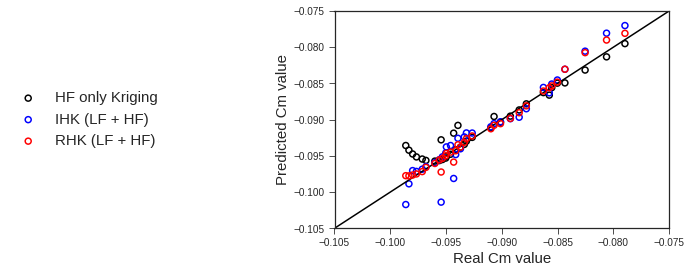

In [38]:
y_pred_vali_i = HK_i_MF.pred_y_MSE(hf_x_vali,1)[0]
y_pred_vali_r = HK_r_MF.pred_y_MSE(hf_x_vali,1)[0]
y_pred_vali_i_HF = HK_i_HF.pred_y_MSE(hf_x_vali,0)[0]
y_pred_vali_r_HF = HK_r_HF.pred_y_MSE(hf_x_vali,0)[0]

r_squared_IK = HK_i_HF.Rsq(hf_x_vali, vali_cm, 0)
r_squared_RK = HK_r_HF.Rsq(hf_x_vali, vali_cm, 0)
r_squared_IHK = HK_i_MF.Rsq(hf_x_vali, vali_cm, 1)
r_squared_RHK = HK_r_MF.Rsq(hf_x_vali, vali_cm, 1)

print(f"R_sq of IK: {r_squared_IK:.4f}")
print(f"R_sq of RK: {r_squared_RK:.4f}")
print(f"R_sq of IHK: {r_squared_IHK:.4f}")
print(f"R_sq of RHK: {r_squared_RHK:.4f}")

rmse_IK = HK_i_HF.RMSE(hf_x_vali, vali_cm, 0)
rmse_RK = HK_r_HF.RMSE(hf_x_vali, vali_cm, 0)
rmse_IHK = HK_i_MF.RMSE(hf_x_vali, vali_cm, 1)
rmse_RHK = HK_r_MF.RMSE(hf_x_vali, vali_cm, 1)

print(f"rmse of IK: {rmse_IK:.4f}")
print(f"rmse of RK: {rmse_RK:.4f}")
print(f"rmse of IHK: {rmse_IHK:.4f}")
print(f"rmse of RHK: {rmse_RHK:.4f}")

MAE_IK = HK_i_HF.MAE(hf_x_vali, vali_cm, 0)
MAE_RK = HK_r_HF.MAE(hf_x_vali, vali_cm, 0)
MAE_IHK = HK_i_MF.MAE(hf_x_vali, vali_cm, 1)
MAE_RHK = HK_r_MF.MAE(hf_x_vali, vali_cm, 1)

print(f"MAE of IK: {MAE_IK:.4f}")
print(f"MAE of RK: {MAE_RK:.4f}")
print(f"MAE of IHK: {MAE_IHK:.4f}")
print(f"MAE of RHK: {MAE_RHK:.4f}")

print(HK_i_HF.total_beta)
print(HK_r_HF.total_beta)
print(HK_i_MF.total_beta)
print(HK_r_MF.total_beta)
# limit = np.array([np.min([y_pred_vali_i, y_pred_vali_r, vali_cm]),np.max([y_pred_vali_i, y_pred_vali_r, vali_cm])])
limit = np.array([-0.105,-0.075])
plt.figure(figsize=(6,4))
plt.xlim([-0.105,-0.075])
plt.ylim([-0.105,-0.075])
plt.plot(limit,limit,c='k')
# plt.scatter(vali_cm,y_pred_vali_i_HF, edgecolors='k',facecolors='none', linewidths=1.5,label = f'IK & RK (HF only, R\N{SUPERSCRIPT TWO}={r_squared_IK:.3f})',zorder=0)
plt.scatter(vali_cm,y_pred_vali_i_HF, edgecolors='k',facecolors='none', linewidths=1.5,label = f'HF only Kriging',zorder=0)


plt.xlabel("Real Cm value", fontsize = 15)
plt.ylabel("Predicted Cm value", fontsize = 15)
plt.scatter(vali_cm,y_pred_vali_i, edgecolors='b',facecolors='none', linewidths=1.5,label = f'IHK (LF + HF)',zorder=2)
plt.scatter(vali_cm,y_pred_vali_r, edgecolors='r',facecolors='none', linewidths=1.5, label = f'RHK (LF + HF)',zorder=3)
# plt.scatter(vali_cm,y_pred_vali_i, edgecolors='b',facecolors='none', linewidths=1.5,label = f'IHK (LF + HF, R\N{SUPERSCRIPT TWO}={r_squared_IHK:.3f})',zorder=2)
# plt.scatter(vali_cm,y_pred_vali_r, edgecolors='r',facecolors='none', linewidths=1.5, label = f'RHK (LF + HF, R\N{SUPERSCRIPT TWO}={r_squared_RHK:.3f})',zorder=3)
plt.xlabel("Real Cm value", fontsize = 15)
plt.ylabel("Predicted Cm value", fontsize = 15)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(-1, 0.5),frameon=False)
plt.show()


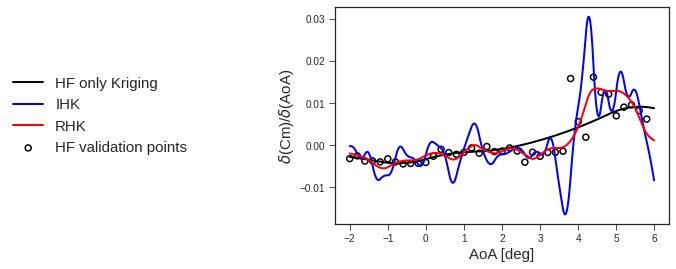

In [34]:
def cal_grad(x,y):
  grad = np.zeros(y.shape[0]-1)
  for enu in range(y.shape[0]-1):
    grad[enu] = ( y[enu+1] - y[enu] ) / ( x[enu+1] - x[enu] )
  return grad
x_test = np.linspace(np.min([np.min(lf_x),np.min(hf_x),np.min(hf_x_vali)]),np.max([np.max(lf_x),np.max(hf_x),np.max(hf_x_vali)]),1001)
y_pred_i_LF= HK_i_MF.pred_y_MSE(x_test, 0)[0]
y_pred_r_LF= HK_r_MF.pred_y_MSE(x_test, 0)[0]
y_pred_i_HF= HK_i_HF.pred_y_MSE(x_test, 0)[0]
y_pred_r_HF= HK_r_HF.pred_y_MSE(x_test, 0)[0]
y_pred_i_MF= HK_i_MF.pred_y_MSE(x_test, 1)[0]
y_pred_r_MF= HK_r_MF.pred_y_MSE(x_test, 1)[0]
hf=np.load("./MyDrive/MyDrive/Colab Notebooks/data fusion/RHK_thesis/kflow_hf.npy")
AoA_start, AoA_end = -2, 6
x = np.linspace(AoA_start, AoA_end,41)
# print(hf)
grad_hf = cal_grad(x,hf[:,2])
grad_HF_only = cal_grad(x_test,y_pred_i_HF)
grad_i_MF = cal_grad(x_test,y_pred_i_MF)
grad_r_MF = cal_grad(x_test,y_pred_r_MF)

# plt.scatter(x[:-1],grad_hf,marker='s',edgecolors='k',facecolors='k',label="HF validation points",zorder = 0)
plt.scatter(x[:-1],grad_hf,edgecolors='k',facecolors='none', linewidths=1.5,label="HF validation points",zorder = 0)
plt.plot(x_test[:-1],grad_HF_only,'k',lw=2,label="HF only Kriging",zorder = 1)
plt.plot(x_test[:-1],grad_i_MF,'b',lw=2,label="IHK",zorder = 2)
plt.plot(x_test[:-1],grad_r_MF,'r',lw=2,label="RHK",zorder = 3)
# plt.scatter(x[0],cm[0],marker='s',edgecolors='k',facecolors='k',label="HF validation points",zorder = 2)
plt.legend(fontsize=15, frameon=False)
plt.xlabel("AoA [deg]",fontsize=15)
plt.ylabel("$ \delta $(Cm)/$ \delta $(AoA)",fontsize=15)
plt.legend(fontsize=15,loc='center left', bbox_to_anchor=(-1, 0.5),frameon=False)
plt.show()
# y_pred_vali_i = HK_i_MF.pred_y_MSE(hf_x_vali,1)[0]
# y_pred_vali_r = HK_r_MF.pred_y_MSE(hf_x_vali,1)[0]

10.749231348350726
8.299692539340287


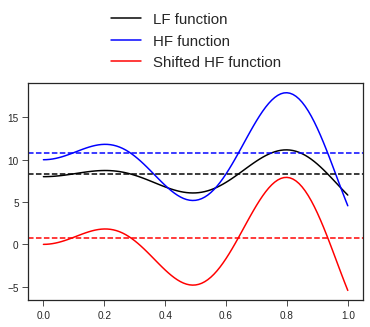

In [ ]:
def test_func(a,x):
  y = a*x*np.sin(x*10)+ 10
  return y
x_test__ = np.linspace(0,1,101)
print(np.mean(test_func(10,x_test__)))
print(np.mean(test_func(4,x_test__))-2)
plt.plot(x_test__,test_func(4,x_test__)-2,'k',label='LF function')
# plt.plot(x_test__,test_func(2,x_test__))
plt.plot(x_test__,test_func(10,x_test__),'b',label='HF function')
plt.plot(x_test__,test_func(10,x_test__)-10,'r',label='Shifted HF function')
plt.axhline(y=8.299692539340287, color='k', linestyle='--')
plt.axhline(y=10.749231348350726, color='b', linestyle='--')
plt.axhline(y=0.749, color='r', linestyle='--')
plt.legend(fontsize=15,loc='lower center', bbox_to_anchor=(0.5, 1),frameon=False)
plt.show()

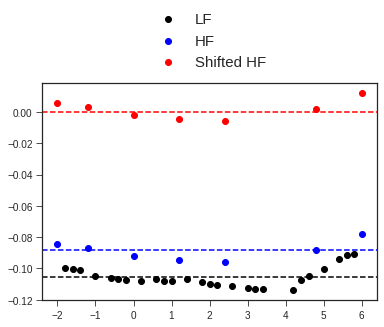

In [ ]:

plt.scatter(lf_x,lf_cm,edgecolors='k',facecolors='k',label="LF")
plt.scatter(hf_x,hf_cm,edgecolors='b',facecolors='b',label="HF")
# plt.scatter(hf_x,hf_cm+0.09,edgecolors='r',facecolors='r',label="Shifted HF")
plt.legend(fontsize=15,loc='lower center', bbox_to_anchor=(0.5, 1),frameon=False)
plt.axhline(y=-0.10564657692307693, color='k', linestyle='--')
plt.axhline(y=-0.08848442857142857, color='b', linestyle='--')
plt.axhline(y=0., color='r', linestyle='--')
plt.show()
# print(lf_x.shape, hf_x.shape, hf_x_vali.shape)
# print(np.sort(lf_x[:,0]))
# print(np.sort(hf_x[:,0]))


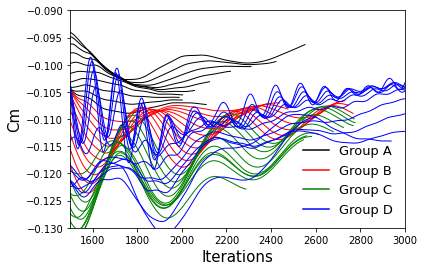

In [ ]:
l2_lf = {}

for i in range(1,42):
  with open(f'./MyDrive/MyDrive/Colab Notebooks/data fusion/RHK_thesis/l2norm_lf/{i}_l2.dat', 'r') as file_:
    file_.readline()
    f_read = file_.readlines()
    temp_l2 = []
    for x in f_read:
      x = x.strip().split()
      temp_l2.append([x[0],x[8]])
    temp_l2 = np.array(temp_l2, dtype = np.float)
    l2_lf[f'{i}'] = temp_l2

for idx,i in enumerate(l2_lf.values()):
  if 0 <= idx <= 9:
    plt.plot(i[:,0],i[:,1],'k',lw=1)
  elif 10 <= idx <= 19:
    plt.plot(i[:,0],i[:,1],'r',lw=1)
  elif 20 <= idx <= 29:
    plt.plot(i[:,0],i[:,1],'g',lw=1)
  elif 30 <= idx <= 40:
    plt.plot(i[:,0],i[:,1],'b',lw=1)
  
# plt.plot([0,0],[99,99],'k',label='AoA -2\N{DEGREE SIGN} ~ 0\N{DEGREE SIGN}')
# plt.plot([0,0],[99,99],'r',label='AoA 0\N{DEGREE SIGN} ~ 2\N{DEGREE SIGN}')
# plt.plot([0,0],[99,99],'g',label='AoA 2\N{DEGREE SIGN} ~ 4\N{DEGREE SIGN}')
# plt.plot([0,0],[99,99],'b',label='AoA 4\N{DEGREE SIGN} ~ 6\N{DEGREE SIGN}')
plt.plot([0,0],[99,99],'k',label='Group A')
plt.plot([0,0],[99,99],'r',label='Group B')
plt.plot([0,0],[99,99],'g',label='Group C')
plt.plot([0,0],[99,99],'b',label='Group D')
plt.xlim(1500,3000)
plt.ylim(-0.13,-0.09)
plt.xlabel("Iterations", fontsize = 15)
plt.ylabel("Cm", fontsize = 15)
plt.legend(fontsize = 13,frameon=False)
plt.show()


[]

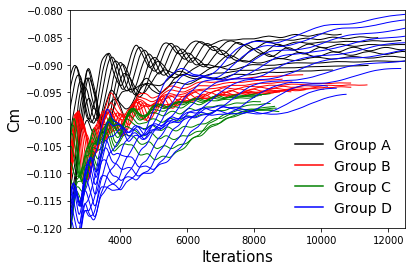

In [ ]:
l2_hf = {}

for i in range(1,42):
  with open(f'./MyDrive/MyDrive/Colab Notebooks/data fusion/RHK_thesis/l2norm_hf/{i}_l2.dat', 'r') as file_:
    file_.readline()
    f_read = file_.readlines()
    temp_l2 = []
    for x in f_read:
      x = x.strip().split()
      temp_l2.append([x[0],x[8]])
    temp_l2 = np.array(temp_l2, dtype = np.float)
    l2_hf[f'{i}'] = temp_l2

for idx,i in enumerate(l2_hf.values()):
  if 0 <= idx <= 9:
    plt.plot(i[:,0],i[:,1],'k',lw=1)
  elif 10 <= idx <= 19:
    plt.plot(i[:,0],i[:,1],'r',lw=1)
  elif 20 <= idx <= 29:
    plt.plot(i[:,0],i[:,1],'g',lw=1)
  elif 30 <= idx <= 40:
    plt.plot(i[:,0],i[:,1],'b',lw=1)

plt.plot([0,0],[99,99],'k',label='Group A')
plt.plot([0,0],[99,99],'r',label='Group B')
plt.plot([0,0],[99,99],'g',label='Group C')
plt.plot([0,0],[99,99],'b',label='Group D')
plt.xlim(2500,12500)
plt.ylim(-0.12,-0.08)
plt.xlabel("Iterations", fontsize = 15)
plt.ylabel("Cm", fontsize = 15)
plt.legend(fontsize = 14,frameon=False)
plt.plot()


In [ ]:
# @title 데이터에 noise가 섞여있는 경우

def cubic_func (x) :

  return x**2
N_pts = 8

x_test = np.array([-1,-0.5,-0.1,0,0.1,0.15,0.5,1])
# y_test_n = np.array([1.20292616, 0.39984616, 0.04874587, -0.12883884, 0.03620817, 0.00193524, 0.10518517, 0.92998561] )

  

x = np.linspace(-1,1,101)
y = cubic_func(x)
y_test_n = cubic_func(x_test)
for enu,i in enumerate(y_test_n):
  y_test_n[enu] += np.random.normal(0,0.05)
x_HK = []
x_HK.append(np.array([[i] for i in x_test]))
# y_HK = [y_test]
y_HK_n = [y_test_n]
pop = [100, 100]
gen = [200,200]

HK_i = HK(x_HK,y_HK_n,pop,gen,"i")
HK_i.train_HK("y")

HK_r = HK(x_HK,y_HK_n,pop,gen,"r")
HK_r.train_HK("y")

plt.style.use('seaborn-ticks')
    


#########  Level 0 starts  #########
   Generation = 43
   Optimal theta = [1.52905634]
   Optimal likelihood = 8.988881
   Optimal R's condition number = 86.404772
   Level 0 finishes with time 4.360501[s]
#########  Total time = 4.361393[s]  #########

#########  Level 0 starts  #########
   Generation = 56
   Optimal theta = [0.14930921]
   Optimal nugget = 3.460956E-03
   Optimal likelihood = 11.397749
   Optimal R's condition number = 2002.694373
   Level 0 finishes with time 5.490385[s]
#########  Total time = 5.490871[s]  #########



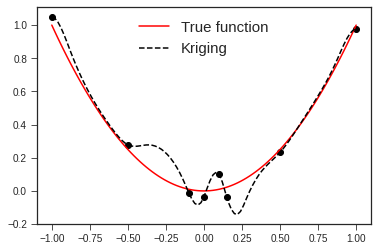

In [ ]:
y_pred_i= HK_i.pred_y_MSE(x, 0)
y_pred_r= HK_r.pred_y_MSE(x, 0)
plt.scatter(x_test,y_HK_n,c='k')
plt.plot(x,cubic_func(x),'r-',label="True function")
plt.plot(x,y_pred_i[0],'k--',label = "Kriging")
# plt.plot(x,y_pred_r[0],'k-',label = "RK")
plt.legend(fontsize=15)
# plt.xlabel("x",fontsize=13)
# plt.ylabel("y",fontsize=13)
plt.show()

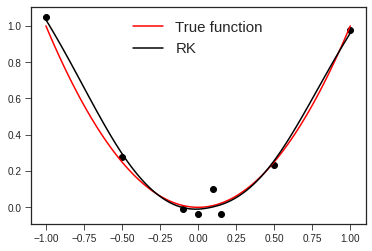

In [ ]:
y_pred_i= HK_i.pred_y_MSE(x, 0)
y_pred_r= HK_r.pred_y_MSE(x, 0)
plt.scatter(x_test,y_HK_n,c='k')
plt.plot(x,cubic_func(x),'r-',label="True function")
# plt.plot(x,y_pred_i[0],'k--',label = "IK")
plt.plot(x,y_pred_r[0],'k-',label = "RK")
plt.legend(fontsize=15)
# plt.xlabel("x",fontsize=13)
# plt.ylabel("y",fontsize=13)
plt.show()

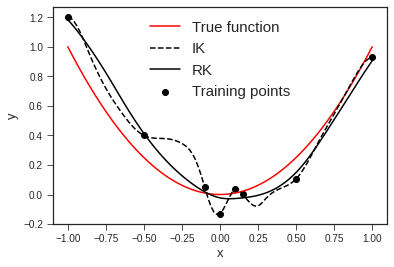

In [ ]:
y_pred_i= HK_i.pred_y_MSE(x, 0)
y_pred_r= HK_r.pred_y_MSE(x, 0)
plt.scatter(x_test,y_HK_n,c='k',label="Training points")
plt.plot(x,cubic_func(x),'r-',label="True function")
plt.plot(x,y_pred_i[0],'k--',label = "IK")
plt.plot(x,y_pred_r[0],'k-',label = "RK")
plt.legend(fontsize=15)
plt.xlabel("x",fontsize=13)
plt.ylabel("y",fontsize=13)
plt.show()

In [ ]:
def hhg_level_2(x): # HF
  y = (6*x.flatten()-2)**2*np.sin(12*x.flatten()-4)
  return y.flatten()
def hhg_level_1(x): # MF
  y = 0.5 * hhg_level_2(x.flatten()) + 10 * (x.flatten() - 0.5 ) -5 
  return y.flatten()
# def hhg_level_1_lin(x):
#   y = 0.5 * hhg_level_2(x.flatten()) -5 
#   return y.flatten()
def hhg_level_0(x): # LF
  y = 3*(0.2 * hhg_level_1(x.flatten()) + 5 * np.sin(x.flatten()) )
  return y.flatten()



# x=[]
# asdf = np.linspace(0,1,21)
# asdf=np.append(asdf,0.725)
# asdf=np.append(asdf,0.775) # LF에서 최적해인 x=0.750 근처에 점이 몰려있는 것을 과장위해
# d = [[temp] for temp in asdf]
# x.append( np.array(d) ) # LF
# x.append( np.array([[0],[0.15],[0.3],[0.45],[0.6],[0.75],[0.9],[1]]) ) # MF
# x.append(np.array([[0],[0.4],[0.6],[1]])) # HF

# y=[]
# y.append( hhg_level_0(x[0]) )
# y.append( hhg_level_1(x[1]) )
# y.append( hhg_level_2(x[2]) )
# for enu,xxx in enumerate(y[0]):
#   y[0][enu] += np.random.normal(0,0.3)
# print(x)
# print(y)

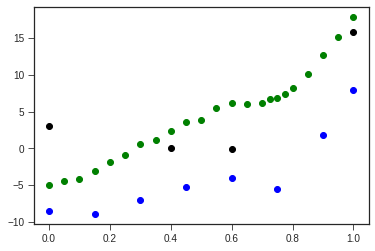

In [ ]:
plt.scatter(x[0],y[0],c='g',label="LF sampling points")
plt.scatter(x[1],y[1],c='b',label="MF sampling points")
plt.scatter(x[2],y[2],c='k',label="HF sampling points")

[array([[0.   ],
       [0.05 ],
       [0.1  ],
       [0.15 ],
       [0.2  ],
       [0.25 ],
       [0.3  ],
       [0.35 ],
       [0.4  ],
       [0.45 ],
       [0.5  ],
       [0.55 ],
       [0.6  ],
       [0.65 ],
       [0.7  ],
       [0.75 ],
       [0.8  ],
       [0.85 ],
       [0.9  ],
       [0.95 ],
       [1.   ],
       [0.725],
       [0.775]]), array([[0.  ],
       [0.15],
       [0.3 ],
       [0.45],
       [0.6 ],
       [0.75],
       [0.9 ],
       [1.  ]]), array([[0. ],
       [0.4],
       [0.6],
       [1. ]])] [array([-5.03282141, -4.42323075, -4.13802121, -3.0227405 , -1.81846438,
       -0.92156957,  0.65333693,  1.18764855,  2.3744443 ,  3.6340209 ,
        3.79034185,  5.51192982,  6.20306483,  5.968832  ,  6.20152874,
        6.81362126,  8.15600694, 10.08655896, 12.68281296, 15.13773614,
       17.90662391,  6.77479274,  7.35858708]), array([-8.48639501, -8.98914032, -7.00778837, -5.25856482, -4.0747189 ,
       -5.49663836,  1.85597517,  7.9148

IndexError: ignored

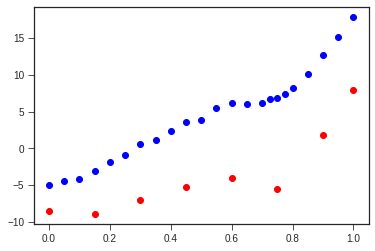

In [ ]:
for i in range(1):
  x = [np.array([[0.   ],
       [0.05 ],
       [0.1  ],
       [0.15 ],
       [0.2  ],
       [0.25 ],
       [0.3  ],
       [0.35 ],
       [0.4  ],
       [0.45 ],
       [0.5  ],
       [0.55 ],
       [0.6  ],
       [0.65 ],
       [0.7  ],
       [0.75 ],
       [0.8  ],
       [0.85 ],
       [0.9  ],
       [0.95 ],
       [1.   ],
       [0.725],
       [0.775]]), np.array([[0.  ],
       [0.15],
       [0.3 ],
       [0.45],
       [0.6 ],
       [0.75],
       [0.9 ],
       [1.  ]]), np.array([[0. ],
       [0.4],
       [0.6],
       [1. ]])]
  y = [np.array([-5.03282141, -4.42323075, -4.13802121, -3.0227405 , -1.81846438,
       -0.92156957,  0.65333693,  1.18764855,  2.3744443 ,  3.6340209 ,
        3.79034185,  5.51192982,  6.20306483,  5.968832  ,  6.20152874,
        6.81362126,  8.15600694, 10.08655896, 12.68281296, 15.13773614,
       17.90662391,  6.77479274,  7.35858708]), np.array([-8.48639501, -8.98914032, -7.00778837, -5.25856482, -4.0747189 ,
       -5.49663836,  1.85597517,  7.91486597]), np.array([ 3.02720998,  0.11477697, -0.14943781, 15.82973195])]

print(x,y)
pop = [100,100,100]
gen = [200,200,200]
x_test = np.linspace(0,1,101)
HK_i = HK(x,y,pop,gen,"i")
HK_i.train_HK("y")
HK_i.plot_var(x_test,2,"none")
HK_r = HK(x,y,pop,gen,"r")
HK_r.train_HK("y")
HK_r.plot_var(x_test,2,"none")



#########  Level 0 starts  #########
   Generation = 42
   Optimal theta = [0.92117295]
   Optimal likelihood = 5.408022
   Optimal R's condition number = 95047.406755
   Level 0 finishes with time 24.396388[s]
#########  Level 1 starts  #########
   Generation = 41
   Optimal theta = [0.12788464]
   Optimal likelihood = -2.450200
   Optimal R's condition number = 129227.923550
   Level 1 finishes with time 4.197447[s]
#########  Level 2 starts  #########
   Generation = 41
   Optimal theta = [0.14299071]
   Optimal likelihood = -5.413059
   Optimal R's condition number = 3776.239700
   Level 2 finishes with time 2.138534[s]
#########  Total time = 30.733028[s]  #########



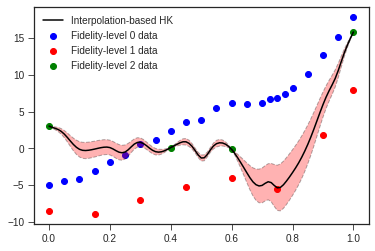

In [ ]:
HK_i = HK(x,y,pop,gen,"i")
HK_i.train_HK("y")
HK_i.plot_var(x_test,2,"none")

#########  Level 0 starts  #########
   Generation = 54
   Optimal theta = [0.41467119]
   Optimal nugget = 3.022891E-04
   Optimal likelihood = 7.067120
   Optimal R's condition number = 56677.940881
   Level 0 finishes with time 32.279914[s]
#########  Level 1 starts  #########
   Generation = 47
   Optimal theta = [0.09505072]
   Optimal nugget = 2.389820E-04
   Optimal likelihood = -2.381488
   Optimal R's condition number = 29584.481229
   Level 1 finishes with time 4.598801[s]
#########  Level 2 starts  #########
   Generation = 52
   Optimal theta = [0.04498907]
   Optimal nugget = 1.003921E-09
   Optimal likelihood = -4.856370
   Optimal R's condition number = 120460.968558
   Level 2 finishes with time 2.494745[s]
#########  Total time = 39.377416[s]  #########



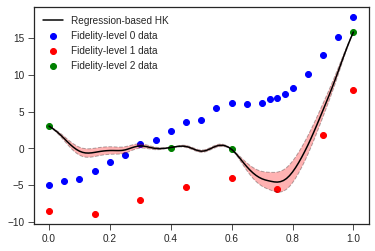

In [ ]:
HK_r = HK(x,y,pop,gen,"r")
HK_r.train_HK("y")
HK_r.plot_var(x_test,2,"none")

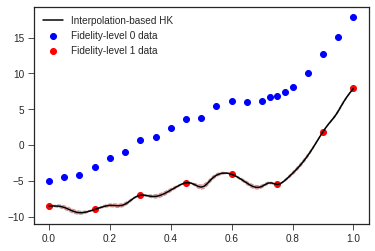

In [ ]:
HK_i.plot_var(x_test,1,"none")

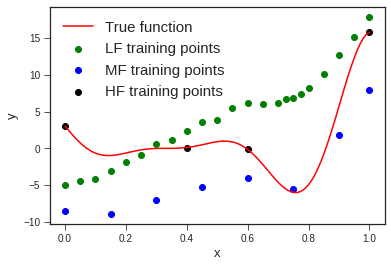

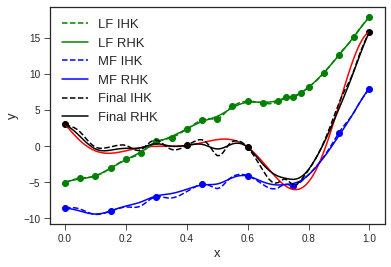

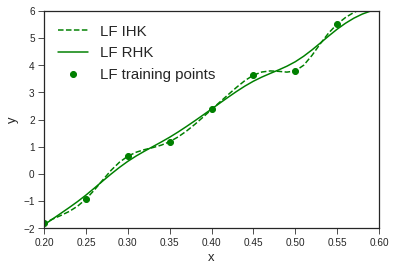

In [ ]:
plt.style.use('seaborn-ticks')

x_test = np.linspace(0,1,101)
y_pred_i= HK_i.pred_y_MSE(x_test, 2)
y_pred_r= HK_r.pred_y_MSE(x_test, 2)
plt.plot(x_test,hhg_level_2(x_test),'r-',label="True function")
plt.scatter(x[0],y[0],c='g',label="LF training points")
plt.scatter(x[1],y[1],c='b',label="MF training points")
plt.scatter(x[2],y[2],c='k',label="HF training points")
plt.xlabel("x",fontsize=13)
plt.ylabel("y",fontsize=13)
plt.legend(fontsize=15)
plt.show()

plt.plot(x_test,hhg_level_2(x_test),'r-')
plt.scatter(x[0],y[0],c='g')
plt.scatter(x[1],y[1],c='b')
plt.scatter(x[2],y[2],c='k')
y_pred_i= HK_i.pred_y_MSE(x_test, 0)
y_pred_r= HK_r.pred_y_MSE(x_test, 0)
plt.plot(x_test,y_pred_i[0],'g--',label = "LF IHK")
plt.plot(x_test,y_pred_r[0],'g-',label = "LF RHK")
y_pred_i= HK_i.pred_y_MSE(x_test, 1)
y_pred_r= HK_r.pred_y_MSE(x_test, 1)
plt.plot(x_test,y_pred_i[0],'b--',label = "MF IHK")
plt.plot(x_test,y_pred_r[0],'b-',label = "MF RHK")
y_pred_i= HK_i.pred_y_MSE(x_test, 2)
y_pred_r= HK_r.pred_y_MSE(x_test, 2)
plt.plot(x_test,y_pred_i[0],'k--',label = "Final IHK")
plt.plot(x_test,y_pred_r[0],'k-',label = "Final RHK")

plt.xlabel("x",fontsize=13)
plt.ylabel("y",fontsize=13)
plt.legend(fontsize=13)
plt.show()

y_pred_i= HK_i.pred_y_MSE(x_test, 0)
y_pred_r= HK_r.pred_y_MSE(x_test, 0)
plt.scatter(x[0],y[0],c='g',label="LF training points")
plt.plot(x_test,y_pred_i[0],'g--',label = "LF IHK")
plt.plot(x_test,y_pred_r[0],'g-',label = "LF RHK")
plt.xlabel("x",fontsize=13)
plt.ylabel("y",fontsize=13)
plt.legend(fontsize=15)
plt.xlim(0.2,0.6)
plt.ylim(-2,6)
plt.show()